In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import luminosity_analytic as l
import luminosity_numerical_no_SG as ln
import luminosity_numerical_SG as lsg
from utils.constants import G, kb, mp, Rb, Me, Re, Msun, RH, RHe, sigma, \
    cmperau, RHill, gammafn, mufn, Rfn, Cvfn, kdust, Tdisk, Pdisk, params, yr, kconst, kdust
from utils.parameters import FT, FSigma, mstar, Y, delad, rhoc, Mc, rc, \
    gamma, Y, a
import profiles_no_SG as atmnoSG
import profiles_SG as atmSG

import cooling as cool
from scipy.interpolate import interp1d
    
reload(l)
reload(ln)
#reload(atm)
reload(cool)

<module 'cooling' from 'cooling.pyc'>

In [64]:
delad = 2./7
a = 0.1
Mc = 10 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = Tdisk(a, FT), kappa = kdust)

In [21]:
model, param, prof = atmnoSG.atmload('a01Mc10', prms)
modelSG, paramSG, profSG = atmSG.atmload('a01Mc10', prms)

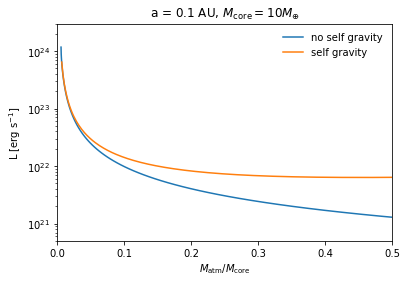

In [22]:
plt.semilogy((param.Mtot - model.Mco / Me) / (model.Mco/Me), param.L, label = 'no self gravity')
plt.semilogy((paramSG.MB - modelSG.Mco / Me) / (model.Mco/Me), paramSG.L, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)
plt.ylim(ymin=5e20, ymax = 3e24)
plt.title(r'a = 0.1 AU, $M_{\rm core}=10 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a01Mc10.pdf')

In [77]:
delad = 2./7
a = 10.0
Mc = 5 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
    
A = 5 * np.pi / 16
mu = 2.35 * mp
gammac = 4./3
muc = 60 * mp

            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = Tdisk(a, FT), kappa = kdust)

In [78]:
model, param, prof = atmnoSG.atmload('a10Mc5', prms)
modelSG, paramSG, profSG = atmSG.atmload('a10Mc5', prms)

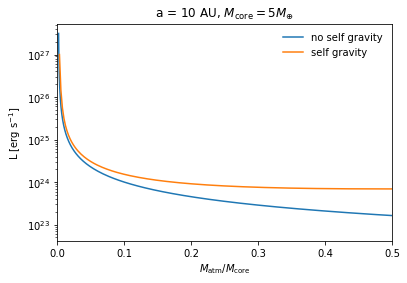

In [80]:
plt.semilogy((param.Mtot - model.Mco / Me) / (model.Mco/Me), param.L, label = 'no self gravity')
plt.semilogy((paramSG.MB - modelSG.Mco / Me) / (model.Mco/Me), paramSG.L, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r'L [erg s$^{-1}$]')
plt.legend(frameon = False)
#plt.ylim(ymin=5e23, ymax = 1e27)
plt.title(r'a = 10 AU, $M_{\rm core}=5 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a60Mc5.pdf')

In [81]:
dt = cool.cooling_global(param, prof, model, out='rcb')[0]
dt2 = cool.cooling_global(param, prof, model, out='rout')[0]
dtSG = cool.cooling_global(paramSG, profSG, modelSG, out='rcb')[0]
dtSG2 = cool.cooling_global(paramSG, profSG, modelSG, out='RB')[0]

time, time2 = [], []
for i in range(len(dt)):
    time = np.append(time, sum(dt[:i + 1]))
for i in range(len(dt2)):
    time2 = np.append(time2, sum(dt2[:i + 1]))

timeSG, timeSG2 = [], []
for i in range(len(dtSG)):
    timeSG = np.append(timeSG, sum(dtSG[:i + 1]))
for i in range(len(dtSG2)):
    timeSG2 = np.append(timeSG2, sum(dtSG2[:i + 1]))

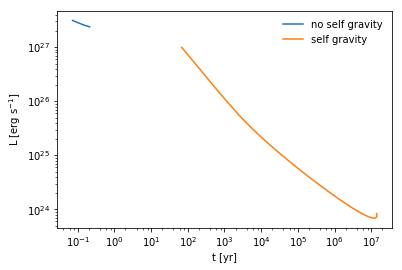

In [82]:
#plt.loglog(t / yr, L, label = 'analytic')
plt.loglog(time / yr, param.L[:-1], label = 'no self gravity')
plt.loglog(timeSG / yr, paramSG.L[:-1], label = 'self gravity')
#plt.xlim(xmin = 1e3, xmax = 1e8)
plt.legend(frameon = False)
plt.xlabel('t [yr]')
plt.ylabel(r'L [erg s$^{-1}$]')

#plt.savefig('../figs/comp_L_vs_t.pdf')

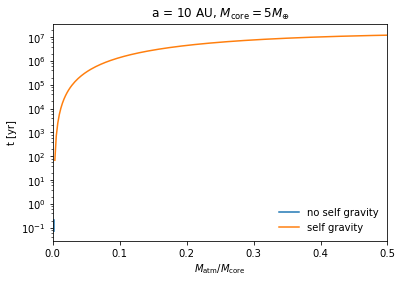

In [84]:
plt.semilogy((param.Mtot[:-1] - model.Mco / Me) / (model.Mco/Me), time/yr, label = 'no self gravity')
plt.semilogy((paramSG.MB[:-1] - modelSG.Mco / Me) / (model.Mco/Me), timeSG/yr, label = 'self gravity')
plt.xlim(xmin = 0, xmax = 0.5)
plt.xlabel(r'$M_{\rm atm}/M_{\rm core}$')
plt.ylabel(r't [yr]')
plt.legend(frameon = False, loc = 4)
#plt.ylim(ymin=1e2, ymax = 1e8)
plt.title(r'a = 10 AU, $M_{\rm core}=5 M_{\oplus}$')

#plt.savefig('../figs/L_vs_M_SG_a01Mc10.pdf')

In [25]:
prms2 = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = kdust)

model2, param2, prof2 = atm.atmload('a01Mc10', prms2)

In [307]:
cneg1 = cool.cooling_local(param, prof, model, out='rout', onlyrad = 1)

In [29]:
cneg2 = cool.cooling_local(param2, prof2, model2, out='rcb', onlyrad = 1)

In [30]:
cneg2 / (param2.Etotcb[1:]-param2.Etotcb[:-1])

array([-0.        ,  0.00784812,  0.0096285 ,  0.01116964,  0.01177573,
        0.01195222,  0.01275688,  0.01291042,  0.01302631,  0.01341022,
        0.01354856,  0.01396423,  0.01391616,  0.01426792,  0.01450241,
        0.01472937,  0.01494267,  0.01513748,  0.01564185,  0.01586534,
        0.0163636 ,  0.01660773,  0.01708601,  0.01774508,  0.01845184,
        0.01920532,  0.02000512,  0.02085045,  0.02174118,  0.02267713,
        0.02365755,  0.02468231,  0.02655338,  0.02859025,  0.02991112,
        0.03240191,  0.03523188,  0.03847367,  0.04229946,  0.04680869,
        0.05244058,  0.05958159,  0.06445678,  0.06183443,  0.0585479 ,
        0.05580465,  0.05290045,  0.05042333,  0.04804808])

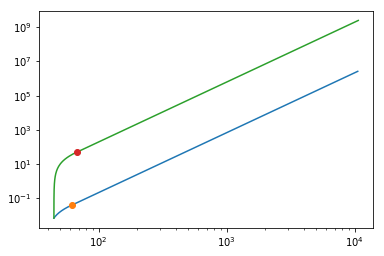

In [85]:
plt.loglog(prof.t[20], prof.P[20])
plt.plot(param.Tcb[20], param.Pcb[20], 'o')

plt.loglog(profSG.t[60], profSG.P[60])
plt.plot(paramSG.Tcb[60], paramSG.Pcb[60], 'o')

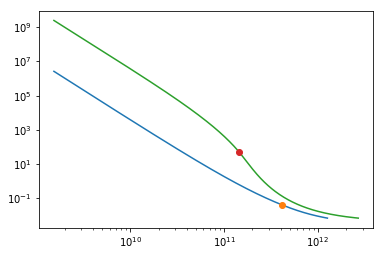

In [86]:
plt.loglog(prof.r[20], prof.P[20])
plt.plot(param.rcb[20]*Re, param.Pcb[20], 'o')

plt.loglog(profSG.r[60], profSG.P[60])
plt.plot(paramSG.rcb[60]*Re, paramSG.Pcb[60], 'o')

In [87]:
f = interp1d(time / yr, param.Mtot[:-1])
f2 = interp1d(time2 / yr, param.Mtot[:-1])
f(3e6), f2(3e6)

(array(nan), array(5.4890306383639915))

In [88]:
fSG = interp1d(timeSG / yr, paramSG.MB[:-1])
fSG2 = interp1d(timeSG2 / yr, paramSG.MB[:-1])
fSG(3e6), fSG2(3e6)
Mrcbd = float(fSG(3e6))

frcbSG = interp1d(paramSG.Mcb, paramSG.rcb*Re)
rcbd = float(frcbSG(Mrcbd))/Re

fTcbSG = interp1d(paramSG.Mcb, paramSG.Tcb)
Tcbd = float(fTcbSG(Mrcbd))

fEtotBSG = interp1d(paramSG.Mcb, paramSG.EtotB)
EtotBd = float(fEtotBSG(Mrcbd))

fEgBSG = interp1d(paramSG.Mcb, paramSG.EgB)
EgBd = float(fEgBSG(Mrcbd))


print Mrcbd, rcbd, Tcbd, EtotBd, EgBd

5.77333521538 226.775279736 68.2041844697 -2.35740743095e+38 -7.92686425653e+38


In [96]:
print - G * modelSG.Mco * (Mrcbd * Me - modelSG.Mco) / (rcbd * Re), #+ \
    #modelSG.Cv * Tcbd * Mrcbd * Me, 
EtotBd, EgBd

[ -6.37404485e+37]

(-2.357407430949691e+38, -7.926864256528118e+38)

In [398]:
f = interp1d(time / yr, param.Mtot[1:])
f(3e6)
print param.Mtot[42], time[42]/yr

11.8609049275 4687685.73493


In [402]:
print - G * model.Mco * (param.Mtot[42] * Me - model.Mco) / (param.rcb[42] * Re) + \
    model.Cv * param.Tcb[42] * param.Mtot[42], param.Etotout[42]

[ -1.37460759e+39] -5.48028950584e+39


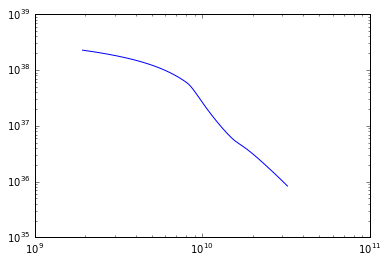

In [389]:
plt.loglog(prof2.r[39], - (- G * prof2.m[39] / prof2.r[39] + model2.Cv * prof2.t[39]) * \
           prof2.rho[39] * prof2.r[39]**3)

In [64]:
len(param.Mtot)

100

In [24]:
paramSG.Mtot, paramSG.MB, paramSG.L

(array([ 11.        ,  11.18585438,  11.37484892,  11.56703669,
         11.76247163,  11.96120862,  12.16330343,  12.36881281,
         12.57779445,  12.79030701,  13.00641015,  13.22616453,
         13.44963186,  13.67687485,  13.90795731,  14.14294411,
         14.3819012 ,  14.62489568,  14.87199576,  15.12327081,
         15.37879136,  15.63862915,  15.90285712,  16.17154944,
         16.44478156,  16.72263016,  17.00517325,  17.29249015,
         17.58466151,  17.88176935,  18.18389709,  18.49112953,
         18.80355293,  19.12125498,  19.44432488,  19.77285333,
         20.10693254,  20.4466563 ,  20.79211999,  21.14342058,
         21.50065669,  21.86392862,  22.23333833,  22.60898953,
         22.99098768,  23.37944001,  23.77445558,  24.17614528,
         24.58462186,  25.        ]),
 array([ 10.81620172,  10.99895467,  11.18480262,  11.37379979,
         11.5659973 ,  11.7614526 ,  11.96022002,  12.16235464,
         12.36791865,  12.57696619,  12.7895587 ,  13.00575832,
  

In [104]:
param.rcb/param.rout

array([ 1.        ,  0.84175503,  0.7910481 ,  0.75184106,  0.72269517,
        0.69861394,  0.67533513,  0.66024847,  0.64186321,  0.6275243 ,
        0.61350571,  0.5998003 ,  0.58972254,  0.57654842,  0.56686134,
        0.55733701,  0.54797271,  0.54181742,  0.53271388,  0.52376329,
        0.51787994,  0.5091786 ,  0.50345907,  0.49500002,  0.48943976,
        0.48394196,  0.47850592,  0.47313094,  0.46518146,  0.45995615,
        0.45478953,  0.44968095,  0.44462975,  0.4396353 ,  0.43715915,
        0.43224861,  0.42739323,  0.42259238,  0.41784547,  0.41315188,
        0.41082489,  0.40621016,  0.40164726,  0.39938507,  0.39489884,
        0.390463  ,  0.3882638 ,  0.3839025 ,  0.38174025,  0.37745222,
        0.37321236,  0.37111032,  0.3669417 ,  0.36487498,  0.36077639,
        0.3587444 ,  0.35471468,  0.35271682,  0.35073022,  0.34679053,
        0.3448373 ,  0.3409638 ,  0.33904339,  0.33713381,  0.33334683,
        0.33146933,  0.3296024 ,  0.32590003,  0.32406447,  0.32

In [6]:
param.L/paramSG.L

array([  1.81872211,   6.33708082,  10.65587465,  14.37848682,
        17.45158886,  19.90565629,  21.79822431,  23.19422257,
        24.15807494,  24.75040487,  25.02669364,  25.03688906,
        24.82545246,  24.43164654,  23.88990856,  23.23026614,
        22.47876715,  21.65787422,  20.78689036,  19.88218048,
        18.95774512,  18.02527525,  17.0945288 ,  16.17361801,
        15.26906963,  14.38621919,  13.52924001,  12.70135113,
        11.90494338,  11.14170974,  10.41273449,   9.71861252,
         9.05951028,   8.43523851,   7.84532976,   7.28907978,
         6.76560129,   6.27385693,   5.81270924,   5.38093881,
         4.97726449,   4.60037801,   4.24895926,   3.92168277,
         3.61723882,   3.33433742,   3.07172557,   2.82817442,
         2.60251226,   2.39360496,   2.20035898,   2.02174761,
         1.85677979,   1.70452013,   1.56408478,   1.43463962,
         1.31538937,   1.20560124,   1.10457897,   1.01167137,
         0.92626956,   0.84780471,   0.77574795,   0.70

In [20]:
print timeSG/yr, time/yr

[  9.40333267e+06   4.45619049e+07   1.08509343e+08   2.02534952e+08
   3.26802525e+08   4.80742251e+08   6.63294567e+08   8.73069699e+08
   1.10844661e+09   1.36765576e+09   1.64882926e+09   1.95005196e+09
   2.26938107e+09   2.60487112e+09   2.95462368e+09   3.31674633e+09
   3.68940054e+09   4.07080781e+09   4.45924834e+09   4.85306726e+09
   5.25067455e+09   5.65054664e+09   6.05123675e+09   6.45140682e+09
   6.84973525e+09   7.24498140e+09   7.63602478e+09   8.02174107e+09
   8.40114719e+09   8.77326047e+09   9.13722055e+09   9.49216614e+09
   9.83738563e+09   1.01721118e+10   1.04957643e+10   1.08077007e+10
   1.11073730e+10   1.13943391e+10   1.16680894e+10   1.19282732e+10
   1.21745342e+10   1.24065032e+10   1.26239517e+10   1.28266446e+10
   1.30143282e+10   1.31868622e+10   1.33441510e+10   1.34860300e+10
   1.36123955e+10   1.37233095e+10   1.38186970e+10   1.38985044e+10
   1.39627880e+10   1.40116193e+10   1.40450151e+10   1.40630112e+10
   1.40657850e+10   1.40534618e+10